## Libraries

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

from scipy.stats import cauchy

## Data Loading

In [2]:
data_dir = Path("../input/atma5/")

train = pd.read_csv(data_dir / "train.csv")
test = pd.read_csv(data_dir / "test.csv")
fitting = pd.read_csv(data_dir / "fitting.csv")
spec_train = pd.read_csv(data_dir / "train_spectrum.csv")
spec_test = pd.read_csv(data_dir / "test_spectrum.csv")

## Get fitting params

In [3]:
train = train.merge(fitting, on="spectrum_id", how="left")
test = test.merge(fitting, on="spectrum_id", how="left")

In [4]:
train.head()

,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,target,params0,params1,params2,params3,params4,params5,params6,rms,beta
0,000da4633378740f1ee8,b2e223339f4abce9b400.dat,79ad4647da6de6425abf,850,2,36,140,1313.0810,0,30.808589,5.811802e+02,1037.714752,1.531423,22469.651641,1032.317268,8.295610,10.028668,2.521298e-02
1,000ed1a5a9fe0ad2b7dd,e2f150a503244145e7ce.dat,79ad4647da6de6425abf,780,3,0,168,159.4150,0,91.300897,1.740582e+04,1080.510452,4.766233,33257.123175,1077.468855,8.018225,7.948485,3.435612e-01
2,0016e3322c4ce0700f9a,3d58b7ccaee157979cf0.dat,c695a1e61e002b34e556,780,1,34,29,-610.7688,0,106.642946,1.000000e-10,1119.464438,2.000000,42579.867913,1378.883338,11.687417,10.739859,2.348528e-15
3,00256bd0f8c6cf5f59c8,ed3641184d3b7c0ae703.dat,c695a1e61e002b34e556,780,2,32,139,1214.6180,0,306.933674,1.099486e+04,1139.855067,5.198692,39349.741703,1145.212849,9.445029,10.379948,2.183921e-01
4,003483ee5ae313d37590,4c63418d39f86dfab9bb.dat,c695a1e61e002b34e556,780,0,45,85,-257.6161,0,46.133256,2.227622e+04,1120.918337,5.668012,31054.928673,1117.107782,7.658710,8.316550,4.176962e-01


## Plot accorting to spectrum_filename

In [61]:
def plot_spectrum(df: pd.DataFrame, fname: str, params2: float, params5: float, target: int, factor=100):
    spec = df.query(f"spectrum_filename == '{fname}'")
    
    x = spec["wl"].values
    noise = factor * np.random.normal(len(x))
    y = spec["intensity"].values
    y = y + noise
    y = (y - y.min()) / (y.max() - y.min())
    
    if target == 0:
        color = "b"
    else:
        color = "r"
    plt.plot(x, y, c=color)
    plt.grid(True)
    plt.xlabel("wave length")
    plt.ylabel("intensity")
    plt.ylim(0, 1)
    plt.title(fname)
    plt.plot([params2] * 100, np.arange(0, 1, 0.01), linestyle="--", linewidth=2.0, label="params2")
    plt.plot([params5] * 100, np.arange(0, 1, 0.01), linestyle="--", linewidth=2.0, label="params5")
    plt.legend()
    plt.show()

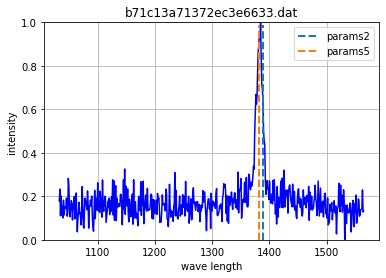

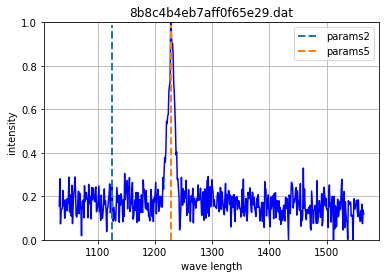

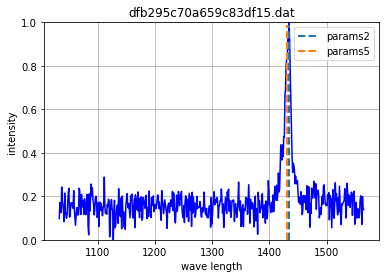

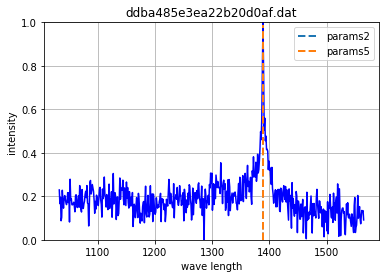

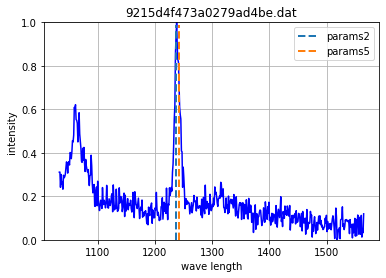

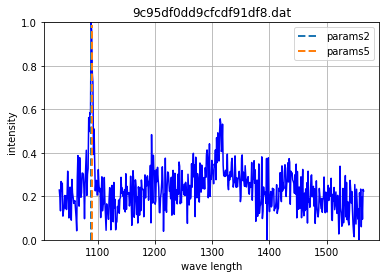

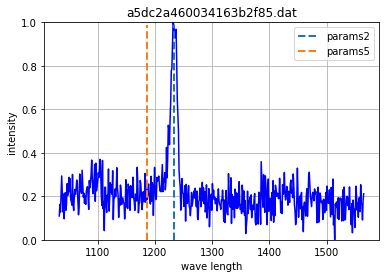

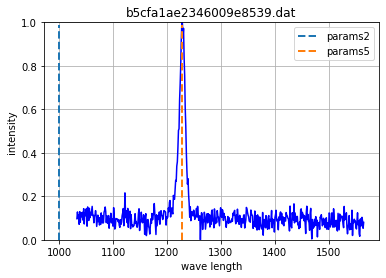

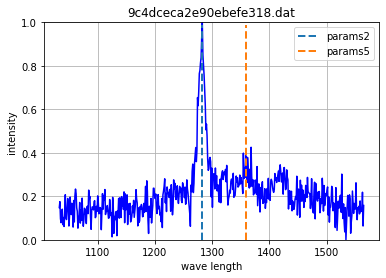

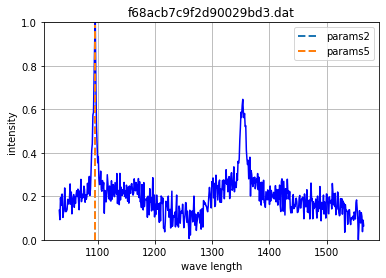

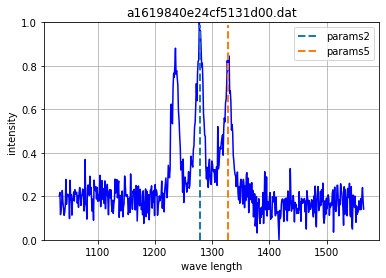

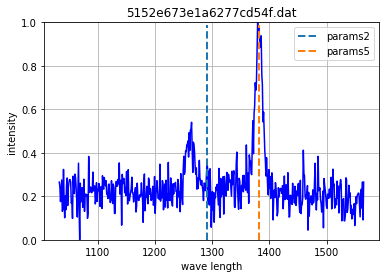

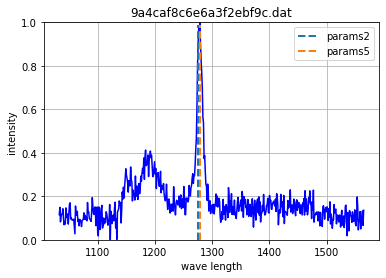

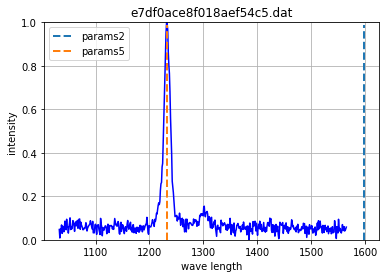

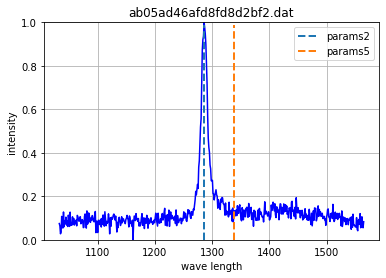

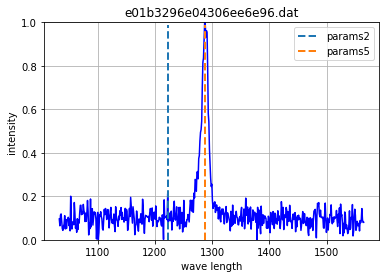

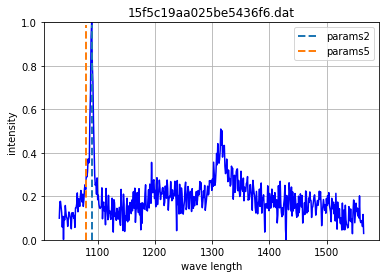

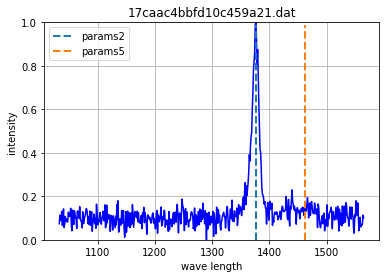

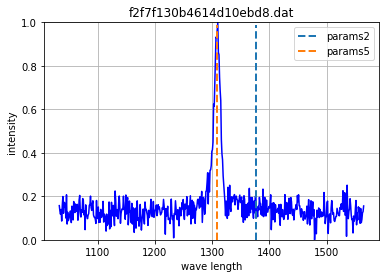

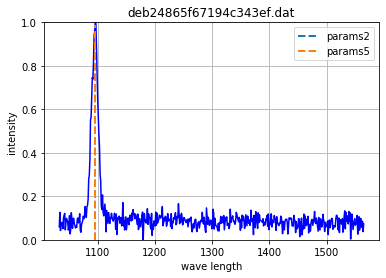

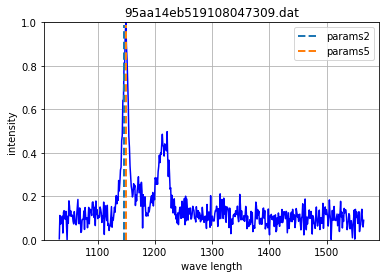

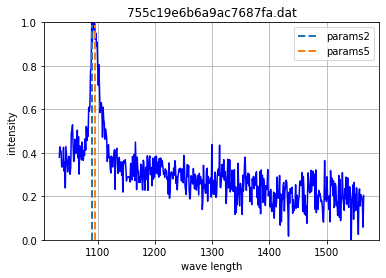

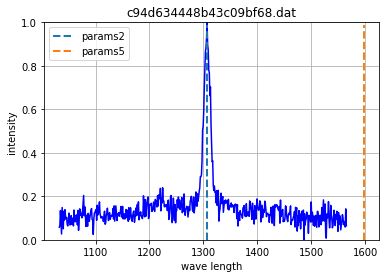

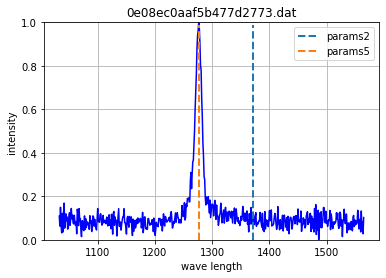

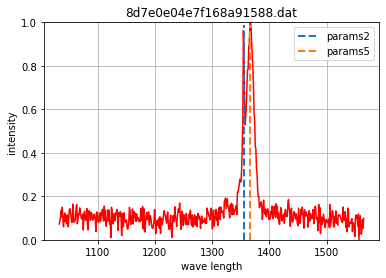

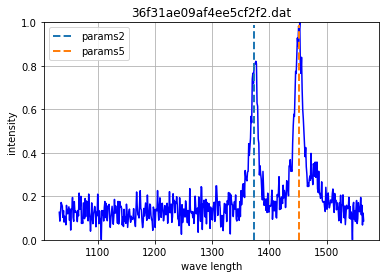

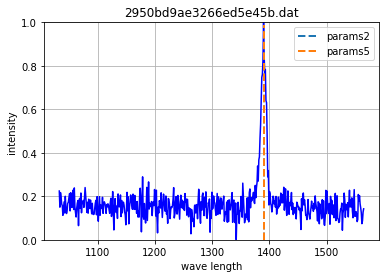

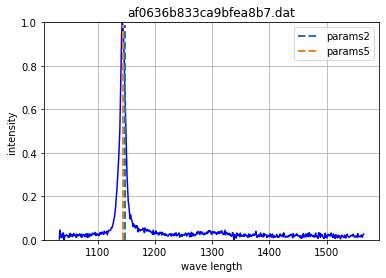

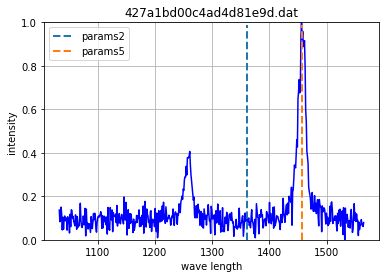

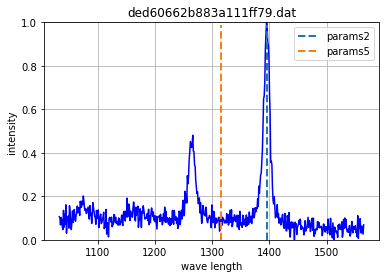

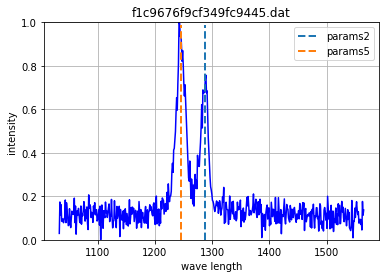

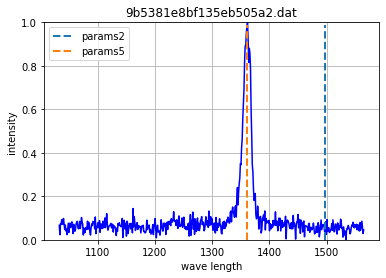

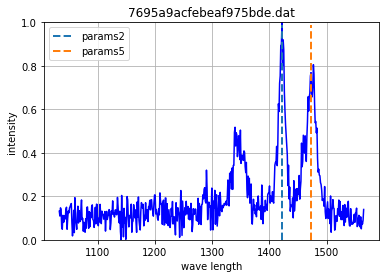

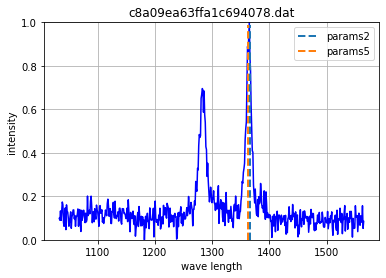

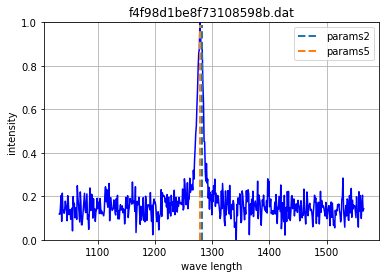

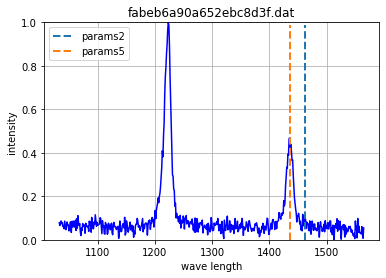

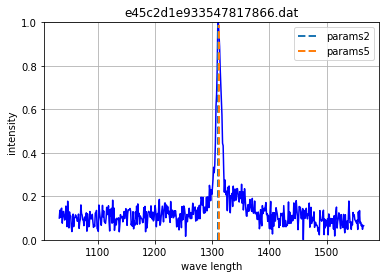

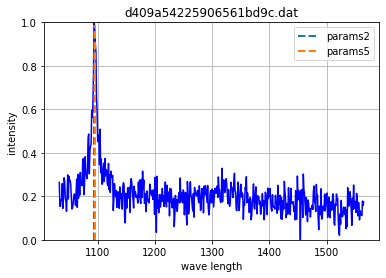

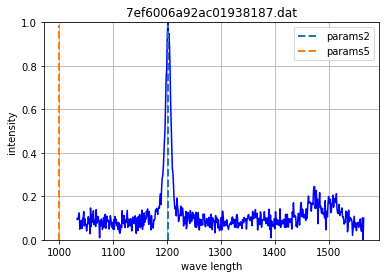

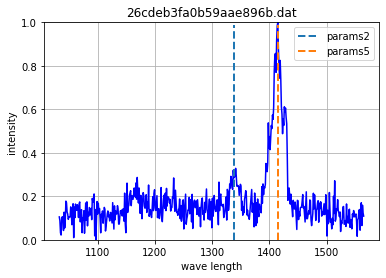

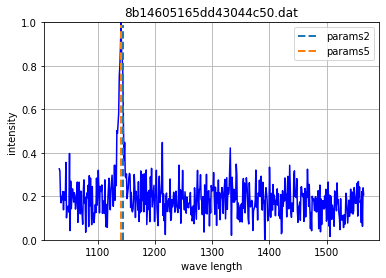

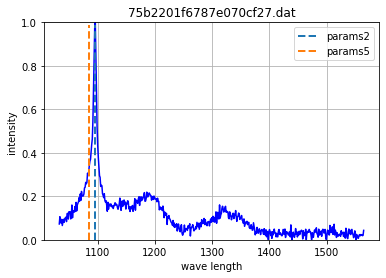

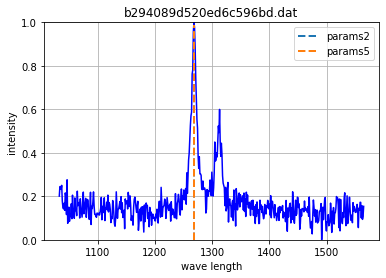

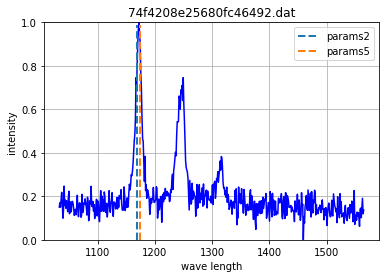

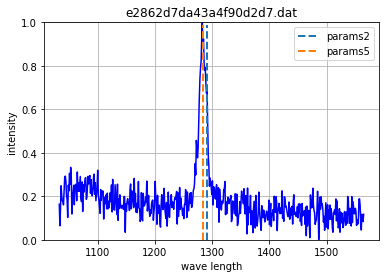

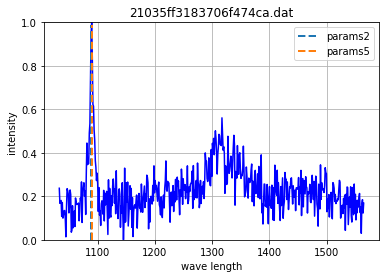

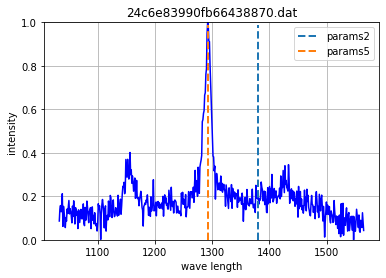

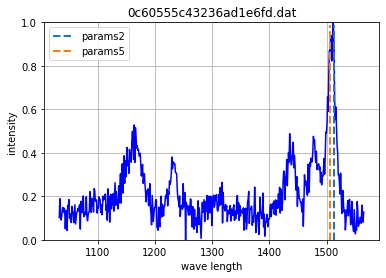

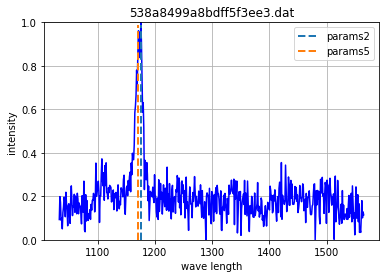

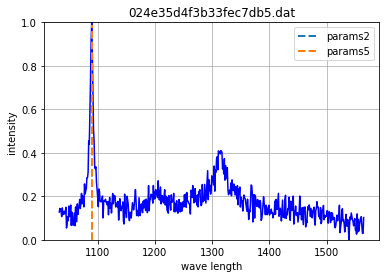

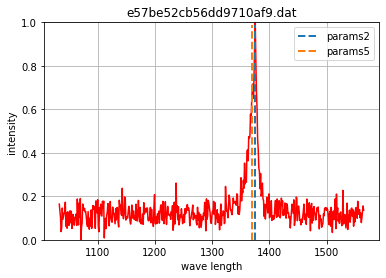

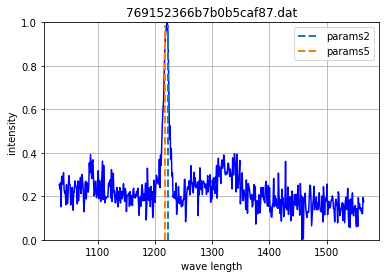

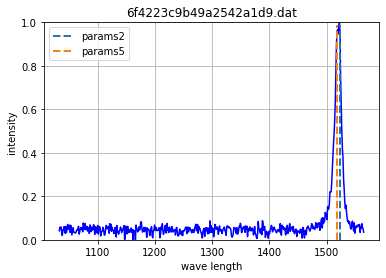

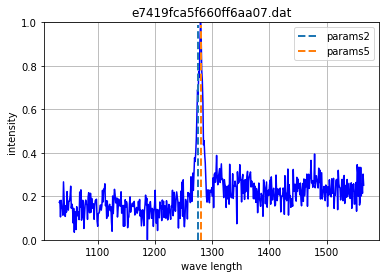

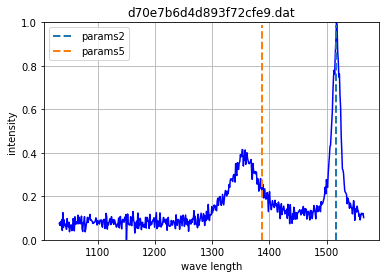

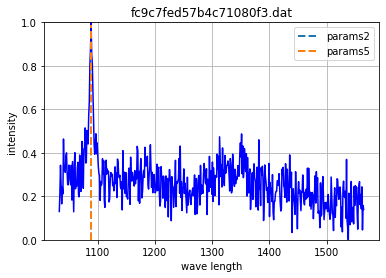

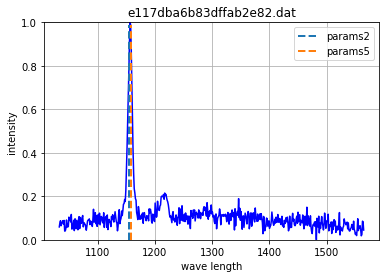

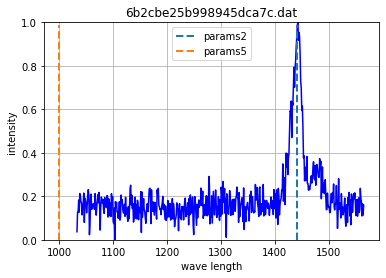

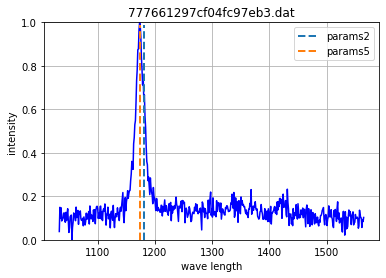

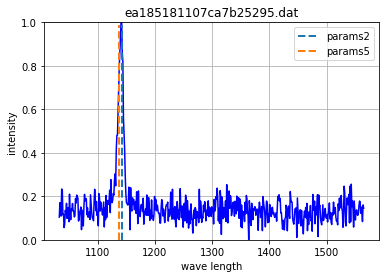

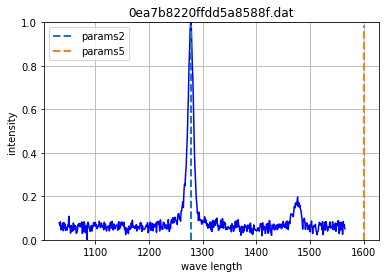

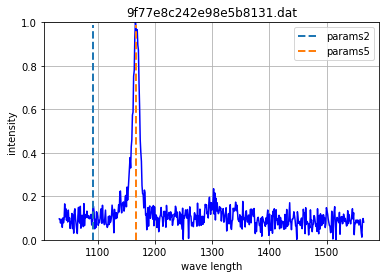

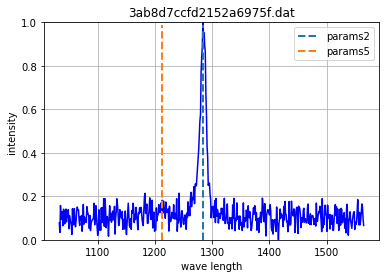

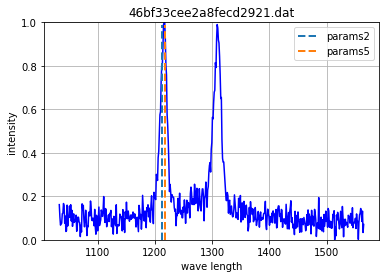

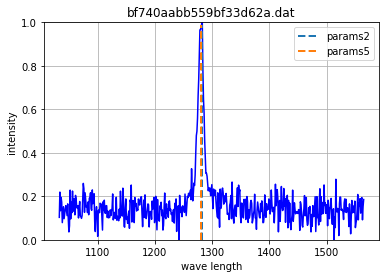

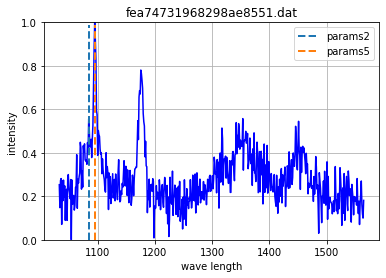

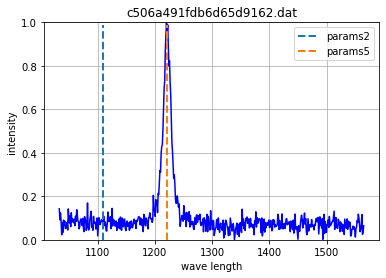

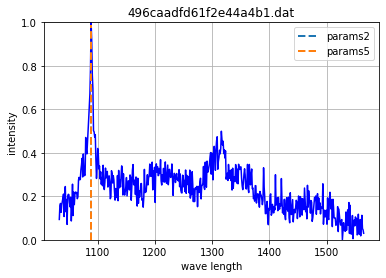

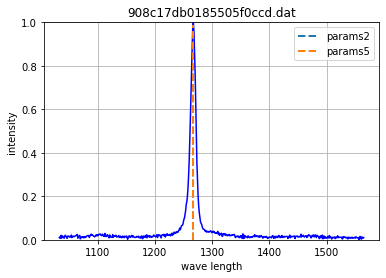

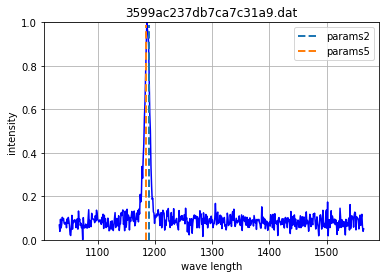

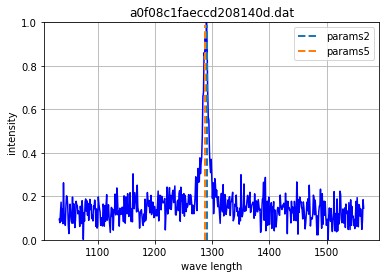

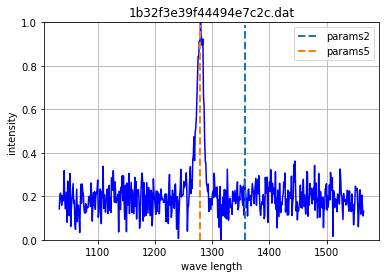

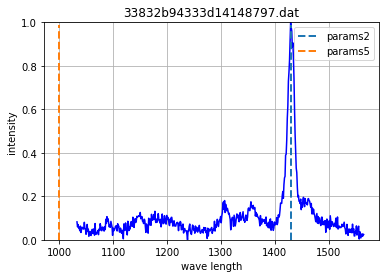

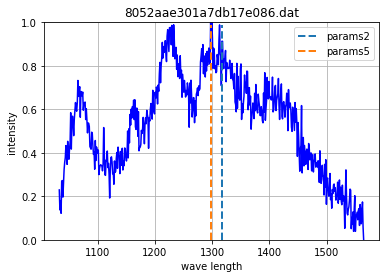

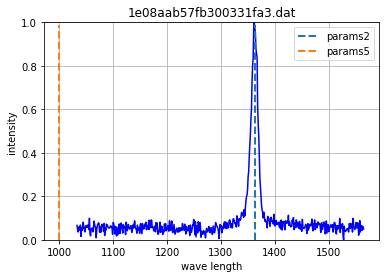

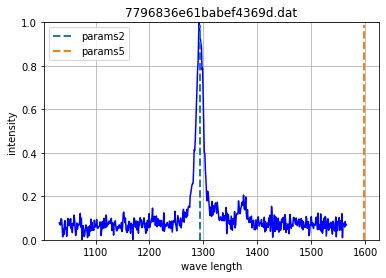

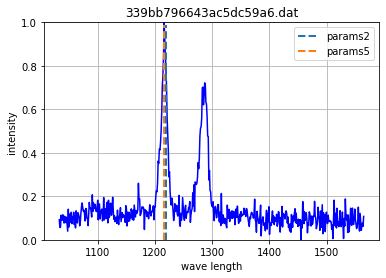

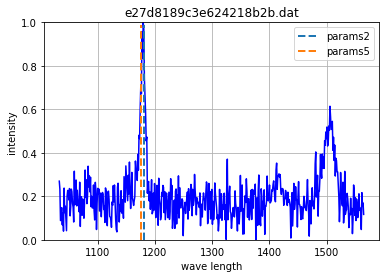

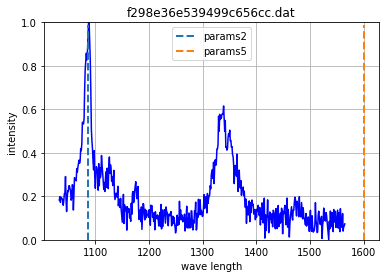

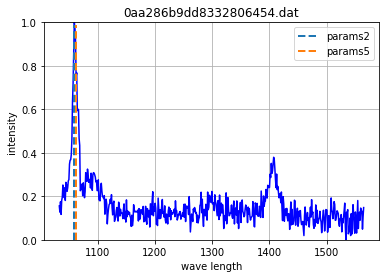

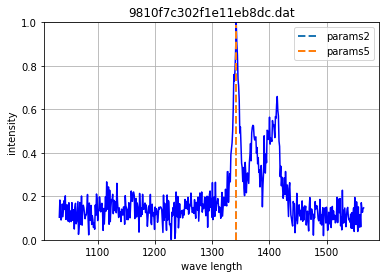

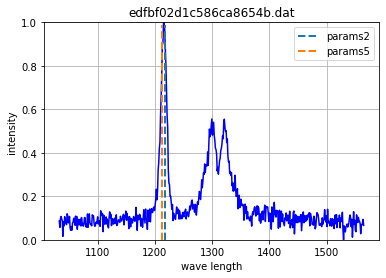

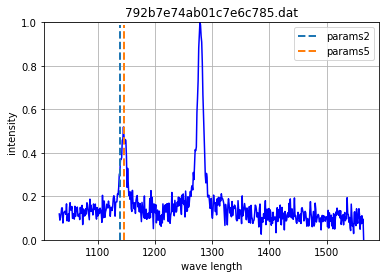

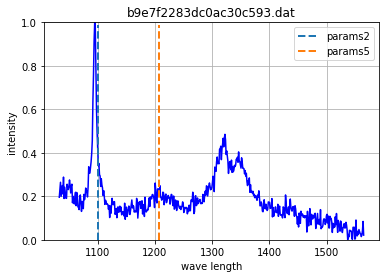

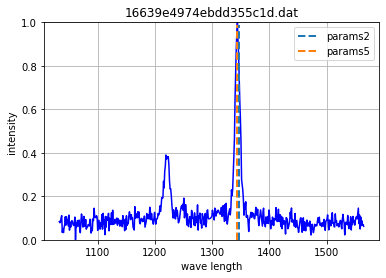

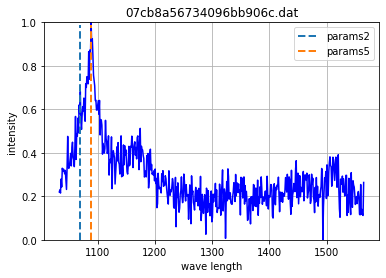

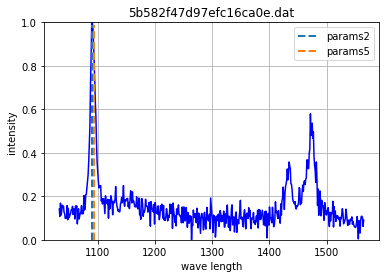

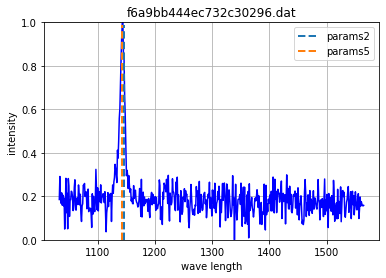

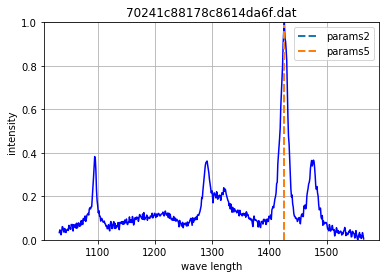

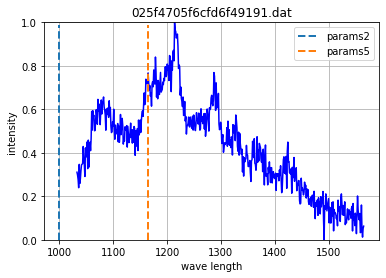

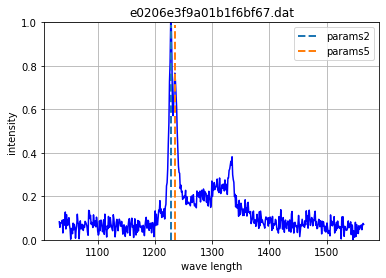

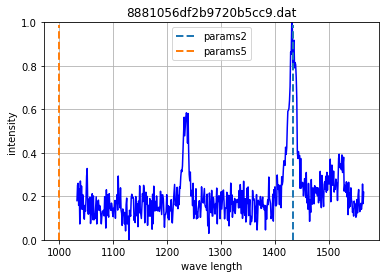

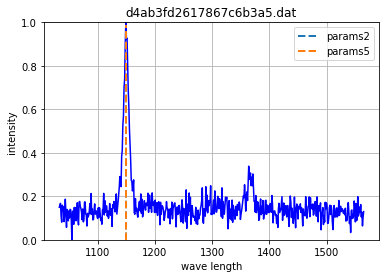

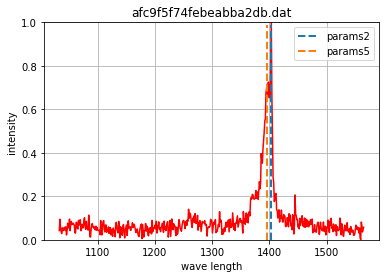

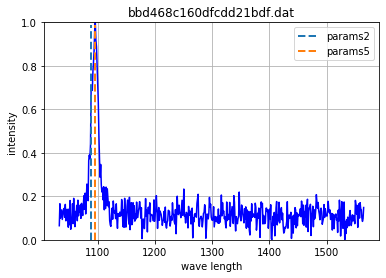

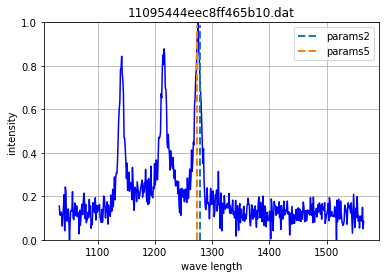

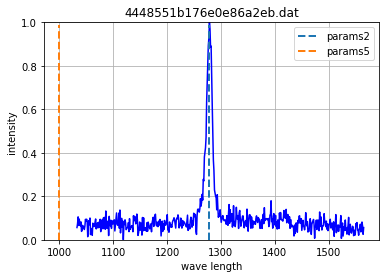

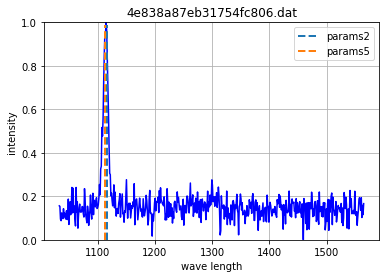

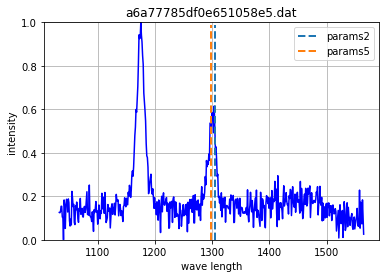

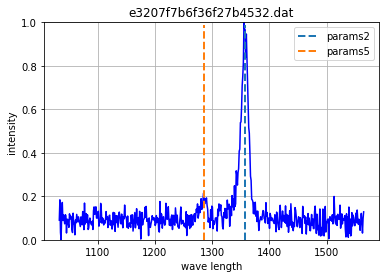

In [63]:
for _ in range(100):
    sample = train.sample(1).reset_index()
    plot_spectrum(spec_train, sample.loc[0, "spectrum_filename"], 
                  sample.loc[0, "params2"], sample.loc[0, "params5"], sample.loc[0, "target"])

In [64]:
sample

,index,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,target,params0,params1,params2,params3,params4,params5,params6,rms,beta
0,5929,cc003e2a2ee8f3858449,e3207f7b6f36f27b4532.dat,6718e7f83c824b1e436d,850,2,12,114,544.8033,0,-13.949821,53434.850252,1357.101252,12.996782,6730.485518,1285.01864,14.474601,7.873858,0.888134


In [65]:
fname = sample.loc[0, "spectrum_filename"]
spec = spec_train.query(f"spectrum_filename == '{fname}'")
wl = spec["wl"].values
params2 = sample.loc[0, "params2"]

In [68]:
np.abs(wl - params2).argmin()

310

In [69]:
params2

1357.101251662988

In [70]:
wl[310]

1356.692